# Finger matching pipeline

# data download

In [1]:
!gdown --id 1kBWr1NFD5P9FMHxTmD5SteFnMj3xEAaO
!gdown --id 1FU2PdOIHsgx84hzupcmtH1T6aWb_YcQo

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kBWr1NFD5P9FMHxTmD5SteFnMj3xEAaO
From (redirected): https://drive.google.com/uc?id=1kBWr1NFD5P9FMHxTmD5SteFnMj3xEAaO&confirm=t&uuid=a3778f45-d5bf-45f6-a9be-f37b21670057
To: /content/fingerslap and palm individual-20241205T031323Z-001.zip
100% 2.14G/2.14G [00:43<00:00, 49.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1FU2PdOIHsgx84hzupcmtH1T6aWb_YcQo
From (redirected): https://drive.google.com/uc?id=1FU2PdOIHsgx84hzupcmtH1T6aWb_YcQo&confirm=t&uuid=b9db1bf9-8b04-4a16-

In [2]:
!unzip '/content/fingerslap and palm individual-20241205T031323Z-001.zip'
!unzip '/content/fingerslap and palm individual-20241205T031323Z-002.zip'

Archive:  /content/fingerslap and palm individual-20241205T031323Z-001.zip
  inflating: fingerslap and palm individual/p12/right palm/IMG_1188.JPG  
  inflating: fingerslap and palm individual/p12/right palm/IMG_1189.JPG  
  inflating: fingerslap and palm individual/p1/left palm/IMG_0745.JPG  
  inflating: fingerslap and palm individual/p1/right hand/IMG_0731.JPG  
  inflating: fingerslap and palm individual/p1/right hand/IMG_0729.JPG  
  inflating: fingerslap and palm individual/p21/Left palm/IMG_1708.JPG  
  inflating: fingerslap and palm individual/p12/right palm/IMG_1192.JPG  
  inflating: fingerslap and palm individual/p21/left hand/IMG_1707.JPG  
  inflating: fingerslap and palm individual/p12/right palm/IMG_1187.JPG  
  inflating: fingerslap and palm individual/p1/left palm/IMG_0746.JPG  
  inflating: fingerslap and palm individual/p1/right hand/IMG_0728.JPG  
  inflating: fingerslap and palm individual/p12/right palm/IMG_1190.JPG  
  inflating: fingerslap and palm individual/p1

In [3]:
!gdown --id 1JcxIlr2fu2bOYac7DOxu6bYI9VbL_HQ2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JcxIlr2fu2bOYac7DOxu6bYI9VbL_HQ2
To: /content/finger_data.zip
100% 16.4M/16.4M [00:00<00:00, 86.1MB/s]


In [4]:
!unzip /content/finger_data.zip

Archive:  /content/finger_data.zip
  inflating: new/p9/right_fingers/p9_R_index1.JPG  
  inflating: new/p3/right_fingers/p3_R_little4.JPG  
  inflating: new/p5/left_fingers/p5_L_little4.JPG  
  inflating: new/p9/right_fingers/p9_R_index2.JPG  
  inflating: new/p9/right_fingers/p9_R_middle3.JPG  
  inflating: new/p3/right_fingers/p3_R_ring4.JPG  
  inflating: new/p5/left_fingers/p5_L_index3.JPG  
  inflating: new/p2/right_fingers/p2_R_ring4.JPG  
  inflating: new/p5/left_fingers/p5_L_index1.JPG  
  inflating: new/p5/left_fingers/p5_L_little3.JPG  
  inflating: new/p3/right_fingers/p3_R_index4.JPG  
  inflating: new/p5/left_fingers/p5_L_little2.JPG  
  inflating: new/p5/left_fingers/p5_L_index4.JPG  
  inflating: new/p5/left_fingers/p5_L_index2.JPG  
  inflating: new/p5/left_fingers/p5_L_ring1.JPG  
  inflating: new/p3/right_fingers/p3_R_middle4.JPG  
  inflating: new/p9/right_fingers/p9_R_middle4.JPG  
  inflating: new/p3/right_fingers/p3_R_index3.JPG  
  inflating: new/p5/left_fingers/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 42.7 MB/s eta 0:00:00


finger cropping

In [6]:
import cv2
import mediapipe as mp
import os
import numpy as np
import matplotlib.pyplot as plt
# Initialize MediaPipe Hands.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.25)
mp_drawing = mp.solutions.drawing_utils

def crop_fingertip(image, x, y, width=700, height=700):
    """Crop a region around the given x, y coordinates."""
    h, w, _ = image.shape
    x1, y1 = max(0, x - width // 2), max(0, y - height // 2)
    x2, y2 = min(w, x + width // 2), min(h, y + height // 2)
    return image[y1:y2, x1:x2]

def process_images_in_folder(folder_path, save_folder_path):
    # Iterate through each image in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png','.JPG')):
            img_path = os.path.join(folder_path, filename)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Could not read image {img_path}")
                continue

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            result = hands.process(image_rgb)

            if result.multi_hand_landmarks:
                for hand_landmarks in result.multi_hand_landmarks:
                    fingertip_indices = [4, 8, 12, 16, 20]
                    fingertip_indices = [12]
                    for idx in fingertip_indices:
                        x = int(hand_landmarks.landmark[idx].x * image.shape[1])
                        y = int(hand_landmarks.landmark[idx].y * image.shape[0])
                        cropped_fingertip = crop_fingertip(image, x, y)


                        fingertip_save_path = os.path.join(save_folder_path, f'{filename.split(".")[0]}_tip{int(idx/4)}.png')
                        cv2.imwrite(fingertip_save_path, cropped_fingertip)

                        # return cropped_fingertip

root_directory = r'/content/fingerslap and palm individual'
save_directory = '/content/output3'

for subject in sorted(os.listdir(root_directory))[1:]:
    subject_path = os.path.join(root_directory, subject)
    if os.path.isdir(subject_path):
        right_hand_folder = os.path.join(subject_path, 'right hand')
        left_hand_folder = os.path.join(subject_path, 'left hand')
        save_right_hand_folder = os.path.join(save_directory, subject)
        # save_left_hand_folder = os.path.join(save_directory, subject, 'left hand')
        os.makedirs(save_right_hand_folder, exist_ok=True)
        # os.makedirs(save_left_hand_folder, exist_ok=True)

        process_images_in_folder(right_hand_folder, save_right_hand_folder)
        process_images_in_folder(left_hand_folder, save_right_hand_folder)


dataset function

In [7]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random

# Custom Dataset for Finger Images with Image Pairs
class FingerDataset(Dataset):
    def __init__(self, root_dir, img_size=(64, 64), transform=None):
        self.root_dir = root_dir
        self.img_size = img_size
        self.transform = transform
        self.data = []
        self.labels = []

        # Traverse each subject folder
        self.subjects = os.listdir(root_dir)
        self.subjects = [sub for sub in self.subjects if os.path.isdir(os.path.join(root_dir, sub))]

        # Collect images and create pairs (positive or negative)
        for subject in self.subjects:
          try:
            subject_folder = os.path.join(root_dir, subject)
            images = [os.path.join(subject_folder, img) for img in os.listdir(subject_folder) if img.endswith('.jpg') or img.endswith('.png')]
            # if len(images)<2:
            #   print('a')
            # try:
            # For each pair of images within the same subject (positive pairs)
            for i in range(len(images)):
                for j in range(i + 1, len(images)):
                    self.data.append((images[i], images[j]))
                    self.labels.append(1)  # Positive pair (same subject, same finger)

            # For each image in the current subject, create a negative pair with random images from other subjects
            for i in range(len(images)):

                # Get random other subject for negative pair
                other_subject = random.choice(self.subjects)
                if other_subject != subject:  # Ensure it's from a different subject
                    other_subject_folder = os.path.join(root_dir, other_subject)
                    other_images = [os.path.join(other_subject_folder, img) for img in os.listdir(other_subject_folder) if img.endswith('.jpg') or img.endswith('.png')]
                    # print(other_images)
                    other_image = random.choice(other_images)
                    self.data.append((images[i], other_image))
                    self.labels.append(0)  # Negative pair (different subjects)
          except:
            pass

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img1_path, img2_path = self.data[idx]
        label = self.labels[idx]

        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.tensor(label, dtype=torch.long)


# Example usage:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Root directory of your dataset
root_dir = '/content/output3'

# # Create dataset and dataloaders
# dataset = FingerDataset(root_dir=root_dir, img_size=(224, 224), transform=transform)

# train_loader = DataLoader(dataset, batch_size=16, shuffle=True)


In [8]:
finger_type = parts[2][:-5]  # Get the finger name (remove the trailing number)
image_number = parts[2][-5]

NameError: name 'parts' is not defined

In [9]:
import os
import shutil

# Define paths
current_root_dir = "/content/new"  # Replace with your input directory path
new_root_dir = "/content/new2"  # Replace with your desired output directory path

# Create the new root directory if it doesn't exist
os.makedirs(new_root_dir, exist_ok=True)

# Traverse the current directory
for subject in os.listdir(current_root_dir):
    subject_path = os.path.join(current_root_dir, subject)
    if os.path.isdir(subject_path):  # Check if it's a subject folder
        # Create the subject folder in the new structure
        new_subject_path = os.path.join(new_root_dir, subject.capitalize())  # Capitalize subject name
        os.makedirs(new_subject_path, exist_ok=True)

        # Traverse the righthand and lefthand folders
        for hand_folder in ["right_fingers", "left_fingers"]:
            hand_path = os.path.join(subject_path, hand_folder)
            if os.path.isdir(hand_path):
                hand_indicator = "R" if "right" in hand_folder.lower() else "L"


                # Process each image in the folder
                for image_file in os.listdir(hand_path):
                    if image_file.endswith((".jpg", ".JPG", ".png", ".PNG")):
                        # Extract finger type from the filename (e.g., index, middle)
                        parts = image_file.split("_")
                        if len(parts) >= 3:
                            finger_type = parts[2][:-5]  # Get the finger name (remove the trailing number)
                            image_number = parts[2][-5]  # Get the number of the finger
                            # print(finger_type)

                            # Create the finger subdirectory
                            finger_dir = os.path.join(new_subject_path, finger_type)
                            os.makedirs(finger_dir, exist_ok=True)

                            # Rename and move the file
                            new_file_name = f"{finger_type}_{image_number}_{hand_indicator}.jpg"
                            source_path = os.path.join(hand_path, image_file)
                            target_path = os.path.join(finger_dir, new_file_name)
                            shutil.copy(source_path, target_path)  # Use shutil.copy() to copy instead of move

print("Directory restructuring completed successfully!")


Directory restructuring completed successfully!


In [10]:
import os
import random
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image


class FingerDataset(Dataset):
    def __init__(self, root_dir, img_size=(64, 64), transform=None):
        self.root_dir = root_dir
        self.img_size = img_size
        self.transform = transform
        self.data = []
        self.labels = []

        # Traverse subject folders
        self.subjects = os.listdir(root_dir)
        self.subjects = [sub for sub in self.subjects if os.path.isdir(os.path.join(root_dir, sub))]

        # Collect images and create pairs
        for subject in self.subjects:
            subject_folder = os.path.join(root_dir, subject)
            # Traverse finger subfolders (e.g., index, middle, etc.)
            fingers = os.listdir(subject_folder)
            fingers = [finger for finger in fingers if os.path.isdir(os.path.join(subject_folder, finger))]

            finger_images = {}
            for finger in fingers:
                finger_folder = os.path.join(subject_folder, finger)
                images = [os.path.join(finger_folder, img) for img in os.listdir(finger_folder) if img.endswith(('.jpg', '.png','.JPG'))]
                finger_images[finger] = images

            # Positive pairs (same finger, same subject)
            for finger, images in finger_images.items():
                for i in range(len(images)):
                    for j in range(i + 1, len(images)):
                        self.data.append((images[i], images[j]))
                        self.labels.append(1)  # Positive pair

            # Intra-subject different finger pairs
            # finger_keys = list(finger_images.keys())
            # for i in range(len(finger_keys)):
            #     for j in range(i + 1, len(finger_keys)):
            #         finger1_images = finger_images[finger_keys[i]]
            #         finger2_images = finger_images[finger_keys[j]]
            #         for img1 in finger1_images:
            #             for img2 in finger2_images:
            #                 self.data.append((img1, img2))
            #                 self.labels.append(2)  # Intra-subject, different fingers

            # Negative pairs (different subjects)
            for finger, images in finger_images.items():
                for img1 in images:
                    # Get random other subject for negative pair
                    other_subject = random.choice(self.subjects)
                    while other_subject == subject:  # Ensure different subject
                        other_subject = random.choice(self.subjects)

                    other_subject_folder = os.path.join(root_dir, other_subject)
                    other_fingers = os.listdir(other_subject_folder)
                    other_fingers = [f for f in other_fingers if os.path.isdir(os.path.join(other_subject_folder, f))]

                    # Randomly select a finger and an image
                    random_finger = random.choice(other_fingers)
                    other_finger_folder = os.path.join(other_subject_folder, random_finger)
                    other_images = [os.path.join(other_finger_folder, img) for img in os.listdir(other_finger_folder) if img.endswith(('.jpg', '.png'))]
                    if other_images:
                        other_image = random.choice(other_images)
                        self.data.append((img1, other_image))
                        self.labels.append(0)  # Negative pair

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img1_path, img2_path = self.data[idx]
        label = self.labels[idx]

        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, torch.tensor(label, dtype=torch.long)
# Example usage:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [11]:
# Root directory of your dataset
root_dir = '/content/new2'
# Create dataset and dataloaders
pair_dataset = FingerDataset(root_dir=root_dir, img_size=(224, 224), transform=transform)

# Split dataset into train and validation sets
train_size = int(0.8 * len(pair_dataset))
val_size = len(pair_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(pair_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [12]:
pair_dataset

Models

In [13]:


# Define CNN Model for Finger Matching
class FingerMatchingCNN(torch.nn.Module):
    def __init__(self):
        super(FingerMatchingCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = torch.nn.Linear(64 * 16 * 16*4, 256)
        self.fc2 = torch.nn.Linear(256, 64)  # Embedding size

    def forward(self, x):
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv1(x), 2))  # Downsample
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv2(x), 2))  # Downsample
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Contrastive Loss function
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = torch.nn.functional.pairwise_distance(output1, output2)
        loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                          label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss


# Apply transformations and prepare data loaders
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale images
# ])

# Instantiate dataset and create pair dataset
# dataset = SyntheticFingerDataset(transform=transform)
# pair_dataset = PairFingerDataset(dataset)

# # Split dataset into train and validation sets
# train_size = int(0.8 * len(pair_dataset))
# val_size = len(pair_dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(pair_dataset, [train_size, val_size])

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)




In [14]:
from torchvision import models

class FingerMatchingResNet(torch.nn.Module):
    def __init__(self, embedding_size=64):
        super(FingerMatchingResNet, self).__init__()
        # Load the pretrained ResNet18 model
        self.resnet = models.resnet18(pretrained=True)
        # Remove the final classification layer
        self.resnet = torch.nn.Sequential(*list(self.resnet.children())[:-1])
        # Add a fully connected layer for embedding
        self.fc = torch.nn.Linear(512, embedding_size)  # ResNet18 output is 512

    def forward(self, x):
        x = self.resnet(x)  # Feature extraction
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)  # Create embedding
        return x


from torchvision.models import vit_b_16

class FingerMatchingViT(torch.nn.Module):
    def __init__(self, embedding_size=64):
        super(FingerMatchingViT, self).__init__()
        # Load pretrained ViT model
        self.vit = vit_b_16(pretrained=True)
        # Replace the classifier with a smaller embedding layer
        # Access the Linear layer within 'heads' directly
        self.vit.heads = torch.nn.Linear(self.vit.heads.head.in_features, embedding_size)

    def forward(self, x):
        x = self.vit(x)  # Extract embedding directly
        return x

Training & Validation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.nn.functional import cosine_similarity
import os

# Instantiate model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = FingerMatchingCNN().to(device)
# model = FingerMatchingResNet().to(device)
model = FingerMatchingViT().to(device)
criterion = ContrastiveLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Variables to track best model
best_val_accuracy = 0.0
best_model_path = "best_finger_matching_model.pth"

# Training and validation loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training phase
    for img1, img2, label in train_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)

        optimizer.zero_grad()
        output1 = model(img1)
        output2 = model(img2)
        loss = criterion(output1, output2, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy using Cosine similarity
        cosine_distances = cosine_similarity(output1, output2, dim=1)
        predictions = (cosine_distances > 0.5).float()  # Predict same class if similarity > 0.5
        correct_train += (predictions == label).sum().item()
        total_train += label.size(0)

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for img1, img2, label in val_loader:
            img1, img2, label = img1.to(device), img2.to(device), label.to(device)

            output1 = model(img1)
            output2 = model(img2)
            cosine_distances = cosine_similarity(output1, output2, dim=1)
            predictions = (cosine_distances > 0.5).float()  # Predict same class if similarity > 0.5

            correct_val += (predictions == label).sum().item()
            total_val += label.size(0)

            all_labels.extend(label.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    val_accuracy = 100 * correct_val / total_val
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with Validation Accuracy: {val_accuracy:.2f}%")

# Load the best model for evaluation
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Generate confusion metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)  # Sensitivity
f1 = f1_score(all_labels, all_predictions)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 96.2MB/s]


Epoch 1/20, Loss: 0.9279, Train Accuracy: 77.23%
Validation Accuracy: 77.02%
Best model saved with Validation Accuracy: 77.02%
Epoch 2/20, Loss: 0.5963, Train Accuracy: 77.43%
Validation Accuracy: 77.02%
Epoch 3/20, Loss: 0.5177, Train Accuracy: 77.43%
Validation Accuracy: 77.02%
Epoch 4/20, Loss: 0.5175, Train Accuracy: 77.43%
Validation Accuracy: 77.02%
Epoch 5/20, Loss: 0.4853, Train Accuracy: 77.43%


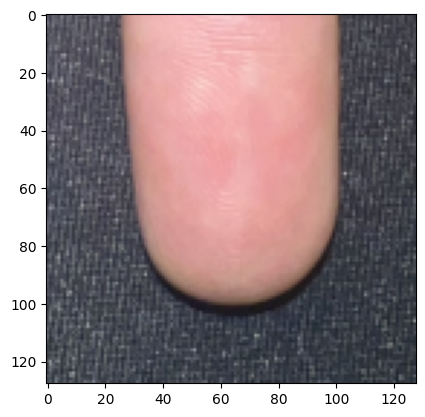

In [ ]:
plt.imshow(img2[0].cpu().numpy().transpose(1, 2, 0))